# ABB Project

![800px-ABB_Logo[1].png](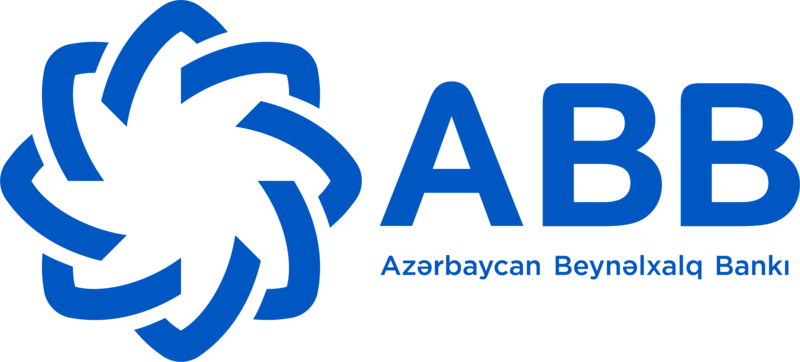)

## Use case

**•** Create ML model from A to Z  with each steps and share jupyter file (.ipynb) for assessment.

**•** We would like to see your own evaluation comments related to each step and not only python scripts.

**•** In dataset Bought-is dependent variable.

**Dataset :** [Bank Customer Estimate Dataset](https://huggingface.co/spaces/riyadahmadov/Bank_Customer_Estimated/blob/main/Python%20examination.xlsx)

## Project Pipeline for Data Analyst

1. **Data Exploration**:
   - Dataseti araşdırmaq və xülasə etmək: Müştəri, cins, əməliyyatların sayı, ATM əməliyyatları arasındakı orta gün intervalı, cari balans, nağd əməliyyatların medianı, telefon kimi əsas dəyişənlərin dəyərlərinin başa düşülməsi.

2. **Data Preprocessing**:
   - Əksik dəyərləri idarə etmək: Əksik məlumatların tamamlanılması və ya silinməsi.
   - Məlumat keyfiyyətinin təmin edilməsi: Məlumatın təmizliyinin və uyğunluğunun yoxlanılması.

3. **Feature Engineering**:
   - Yeni xüsusiyyətlər yaratmaq: Əlavə anlayışlar verə biləcək yeni dəyişənlər yaradılması.

4. **Creating of class**:
   - End-to-end prosesi vahid class-ın daxilində yazılması və daha sonra yeniden bütün proseduru çağırmaq əvəzinə bir class ilə bütün işlərin görülməsi

5. **Reporting and Insights**:
   - Nəticələrin vizuallaşdırılması: Python kitabxanaları (Matplotlib, Seaborn) ilə tapıntıları qrafiklər vasitəsilə aydın şəkildə təqdim edilməsi.

### Data Exploration

In [2]:
# !pip install -U optbinning

In [3]:
# Xəbərdarlıqların silinməsi
import warnings as wg
wg.filterwarnings('ignore')

# Data manipulation
import pandas as pd

# Optimal Binning
from optbinning import OptimalBinning

In [6]:
# Data-nın import edilməsi
# df = pd.read_excel(r'C:\Users\HP\OneDrive\İş masası\abb_project\Python examination.xlsx', sheet_name = 'Dataset for python model')
df = pd.read_excel('Python examination.xlsx', sheet_name = 'Dataset for python model')

In [7]:
# İlk öncə column adlarına baxılması (data ilə ilkin tanışlıq üçün)
df.columns

Index(['customer', 'gender', 'count of transactions',
       'average day interval between atm transactions', 'current balance',
       'median of cash transactions', 'phone', 'Bought'],
      dtype='object')

In [8]:
# Məlumat hədlərinə baxaq və ilkin təəsürat yaransın data haqqında
df.head(3)

,customer,gender,count of transactions,average day interval between atm transactions,current balance,median of cash transactions,phone,Bought
0,1,NaN,296,3,10618,289,NaN,1
1,2,NaN,0,0,483,0,NaN,1
2,3,M,189,2,7031,1408,ANDROID,1


In [ ]:
# Yeni funksiya yaradılması və bütün datanı təsvir edə biləcək funksiyaların və metodların içində yazılması
def describe_data(df):
    print("#### Data-ya ön baxış: ####")
    print(f"\n############ Shape of the DataFrame: {df.shape}")

    print("\n############ First 5 Rows of the Dataset ############")
    print(df.head())

    print("\n############ Column Names ############")
    print(df.columns.tolist())

    print("\n############ Data Types ############")
    print(df.dtypes)

    print("\n############ Missing Values Summary ############")
    print(df.isnull().sum())

    print("\n############ Percentage of Missing Values ############")
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    print(missing_percentage)

    print("\n############ Descriptive Statistics ############")
    print(df.describe(include='all'))

    print("\n############ Unique Values in Each Column ############")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

    print("\n############ Value Counts for Each Column ############")
    for col in df.columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())

    print("\n############ Info ############")
    df_info = df.info()

    print("\n############ Summary of Duplicate Rows ############")
    print(f"Total duplicate rows: {df.duplicated().sum()}")

describe_data(df)

#### Data-ya ön baxış: ####

############ Shape of the DataFrame: (313, 8)

############ First 5 Rows of the Dataset ############
   customer gender  count of transactions  \
0         1    NaN                    296   
1         2    NaN                      0   
2         3      M                    189   
3         4    NaN                   3572   
4         5    NaN                    228   

   average day interval between atm transactions current balance  \
0                                              3           10618   
1                                              0             483   
2                                              2            7031   
3                                             25                   
4                                              3            6680   

   median of cash transactions    phone  Bought  
0                          289      NaN       1  
1                            0      NaN       1  
2                         1408  ANDROID 

#### İlkin təhlil nəticəmiz:

##### **•** Data müştərilərin id-si (ardıcıl index kimi verilib), cinsi, tranzaksiya sayı, atm-dən istifadə edilirək edilən tranzaksiyaların arasında ortalama gün fərqi,hazırki balans, nağd ödənişin medianı, telefonun əməliyyat sistemi, və yekunda müştərinin məhsulu alıb yaxud almaması haqqında məlumat verir.

##### **•** Data typelardan: current balance int olmalıdır amma object verilib.
##### **•** Customer id int deyil string olması daha məqsədəuyğundur.

##### **•** Null dəyərlər: iki sütunda null dəyərlər var. Cins sütunu (12.5 %) / Telefon əməliyyat sistemi sütunu. (23.3 %)

##### **•** Digər təhlili məlumatlar power bi file-nda veriləcək.

#### Biznes Anlayışı

#### Məlumatın təhlilini etsək (hər bir column üçün):

- **customer**: Müştərinin id-si. Aydındır ki, hər sətir fərqli bir müştəriyə aiddir

- **gender**: Müştərinin cinsi. M / F

- **count of transactions**: Müştərinin həyata keçirdiyi əməliyyatların ümumi sayı

- **average day interval between atm transactions**: Müştərinin ATM əməliyyatları arasında keçən orta gün sayı.

- **current balance**: Müştərinin cari hesabdakı balansı.

- **median of cash transactions**: Müştərinin həyata keçirdiyi nağd əməliyyatların median məbləği.

- **phone**: Müştərinin istifadə etdiyi telefon və ya əməliyyat sistemi növü.

- **Bought**: Müştərinin bir məhsul və ya xidmət alıb-almadığını göstərir (1 = Bəli, 0 = Xeyr).

#### Biznes İstiqaməti

Bu təhlil vasitəsilə bank, hansı müştərilərin məhsulu alma ehtimalının daha yüksək olduğunu müəyyənləşdirə bilər. Bu da marketinq kampaniyalarının daha hədəflənmiş və effektiv olmasına kömək edər. Beləliklə, bank gələcək kampaniyalarını daha dəqiq planlaşdıra bilər.

### Data Preprocessing

In [ ]:
# Məlumatın təhlilində gördüyümüz kimi null value iki sütunda mövcuddur
df.isnull().sum()

,0
customer,0
gender,39
count of transactions,0
average day interval between atm transactions,0
current balance,0
median of cash transactions,0
phone,73
Bought,0


In [ ]:
# Məlumat hədlərinin data type-na baxılması
df.select_dtypes(exclude = ['int','float']).dtypes

,0
gender,object
current balance,object
phone,object


In [ ]:
# Sütunda unique dəyərlərin sayına baxılması
for i in df.select_dtypes(exclude = ['int','float']).columns:
  print('Sütun: ',i)
  print('Unique dəyər sayları: ',df[i].nunique(),'\n')

Sütun:  gender
Unique dəyər sayları:  2 

Sütun:  current balance
Unique dəyər sayları:  244 

Sütun:  phone
Unique dəyər sayları:  2 



In [ ]:
# Sütunda unique dəyərlərə baxılması və ordinal and nominal dəyərlərin müəyyən edilməsi
for i in df.select_dtypes(exclude = ['int','float']).columns:
  print('Sütun: ',i)
  print('Unique dəyər sayları: ',df[i].unique(),'\n')

Sütun:  gender
Unique dəyər sayları:  [nan 'M' 'F'] 

Sütun:  current balance
Unique dəyər sayları:  [10618 483 7031 ' ' 6680 1036 8194 6777 476 4 11 2538 0 3911 1 9805 368
 263 3043638 2 995 28250 4546 2713 372 10312 1989 549 2505 6345 173 1830
 5690 9 13 2469 2750 1416 280 114 921 8283 1217 3 16 15128 19 361 32 2197
 5 2685 58 195 10090 17557 45509 26738 31172 182277 875 4838 117872 23088
 8962 48 15914 117 1576 3938 1694 1707 21581 8900 2672 2560 4235 32330
 10677 3715 14 20383 7816 4610 87 38288 2243 2663 25673 22067 908 4043
 14576 4970 3356 122913 841287 6 3460 1435 367 9254 2510 38183 40 14736
 1010 7896 669 5891 621 312 3488 1189 2563 137 3196 2168 1450 6255 3775
 399 1823 3737 4834 4499 1412 1651 5399 16331 2187 8187 10324 3113 2477
 12814 21677 1706 1295 2494 369 3049 12687 1428 3652 76 5405 36077 3989
 729 10 26 6873 241 3976 1671 11224 395 3119 4701 2525 123 1441 5159 22491
 945 7 893 5986 4142 829 674 4305 142 6627 70 27127 6741 324 266 2992 15
 4128 127 2404 15689 56 1826

In [ ]:
# Null value-ların doldurulması
df['gender'].fillna("Məlumat yoxdur", inplace = True)
df['phone'].fillna("Məlumat yoxdur", inplace = True)
df.loc[df['current balance'] == ' ', 'current balance'] = df.loc[df['current balance'] == ' ', 'current balance'].apply(lambda x: -1 if x == ' ' else x)

In [ ]:
# Sütun adlarının dəyişdirilməsi
df.columns = ['Müştəri', 'Cins', 'Əməliyyatların sayı',
              'ATM əməliyyatları arasında orta gün intervalı', 'Cari balans',
              'Nağd əməliyyatların medianı', 'Telefon', 'Satın alma']

In [ ]:
# Data tiplərinin dəyişdirilməsi
df['Cari balans'] = df['Cari balans'].astype(int)

### Feature Engineering

In [ ]:
# Optimal dağılımlı sütunların yaradılması
def create_binning_column(df, column_name, target_column, suffix="_aralıq"):
    optbin = OptimalBinning(name=column_name, dtype="numerical")
    optbin.fit(df[column_name], df[target_column])
    binning_table = optbin.binning_table.build()
    df[column_name + suffix] = optbin.transform(df[column_name], metric="bins")
    return binning_table

columns_to_bin = ['Əməliyyatların sayı', 'ATM əməliyyatları arasında orta gün intervalı',
                  'ATM əməliyyatları arasında orta gün intervalı', 'Cari balans','Nağd əməliyyatların medianı']

binning_tables = {}

for column in columns_to_bin:
    binning_table = create_binning_column(df, column, 'Satın alma')
    binning_tables[column] = binning_table

In [ ]:
df[['Əməliyyatların sayı_aralıq', 'ATM əməliyyatları arasında orta gün intervalı_aralıq', 'Cari balans_aralıq', 'Nağd əməliyyatların medianı_aralıq']].head(3)

,Əməliyyatların sayı_aralıq,ATM əməliyyatları arasında orta gün intervalı_aralıq,Cari balans_aralıq,Nağd əməliyyatların medianı_aralıq
0,"[197.50, 321.50)","[1.00, 3.50)","[2763.00, 10647.50)","[271.00, 600.00)"
1,"(-inf, 17.50)","(-inf, 1.00)","[5.50, 552.50)","(-inf, 2.00)"
2,"[17.50, 197.50)","[1.00, 3.50)","[2763.00, 10647.50)","[1383.50, inf)"


In [ ]:
# İndi isə aralıqları visual üçün daha uyğun formada göstərək
def format_range(r):
    r = r.replace("(-inf", "[0").replace("inf)", "∞)")
    start, end = r[1:-1].split(', ')
    return f"{start} - {end}"

for col in ['Əməliyyatların sayı_aralıq', 'ATM əməliyyatları arasında orta gün intervalı_aralıq', 'Cari balans_aralıq', 'Nağd əməliyyatların medianı_aralıq']:
    df[col] = df[col].apply(format_range)

In [ ]:
# Dəyərlərin adlandırılması
df['Cins'] = df['Cins'].apply(lambda x: 'Kişi' if x == 'M' else 'Qadın')
df['Satın alma'] = df['Satın alma'].apply(lambda x: 'Xidməti alıb' if x == 1 else 'Xidməti almayıb')

### Creating of class

In [9]:
# End-to-end prosesi vahid class-ın daxilində yazaq və daha sonra yeniden bütün proseduru çağırmaq əvəzinə bir class ilə bütün işimizi görək
df = pd.read_excel('Python examination.xlsx', sheet_name = 'Dataset for python model')

class DataPreparer:
    def __init__(self, df):
        self.df = df

    # Null value-ların doldurulması
    def fill_missing_values(self):
        self.df['gender'].fillna("Məlumat yoxdur", inplace=True)
        self.df['phone'].fillna("Məlumat yoxdur", inplace=True)
        self.df.loc[self.df['current balance'] == ' ', 'current balance'] = -1

    # Sütun adlarının dəyişdirilməsi
    def rename_columns(self):
        self.df.columns = ['Müştəri', 'Cins', 'Əməliyyatların sayı',
                           'ATM əməliyyatları arasında orta gün intervalı', 'Cari balans',
                           'Nağd əməliyyatların medianı', 'Telefon', 'Satın alma']

    # Data tiplərinin dəyişdirilməsi
    def change_data_types(self):
        self.df['Cari balans'] = self.df['Cari balans'].astype(int)

    # Optimal dağılımlı sütunların yaradılması
    def create_binning_column(self, column_name, target_column, suffix="_aralıq"):
        optbin = OptimalBinning(name=column_name, dtype="numerical")
        optbin.fit(self.df[column_name], self.df[target_column])
        binning_table = optbin.binning_table.build()
        self.df[column_name + suffix] = optbin.transform(self.df[column_name], metric="bins")
        return binning_table

    def apply_binning(self, columns_to_bin, target_column='Satın alma'):
        binning_tables = {}
        for column in columns_to_bin:
            binning_table = self.create_binning_column(column, target_column)
            binning_tables[column] = binning_table
        return binning_tables

    # İndi isə aralıqları visual üçün daha uyğun formada göstərək
    def format_range(self, r):
        r = r.replace("(-inf", "[0").replace("inf)", "∞)")
        start, end = r[1:-1].split(', ')
        return f"{start} - {end}"

    # Range formatting təyin edilməsi
    def apply_range_formatting(self, columns):
        for col in columns:
            self.df[col] = self.df[col].apply(self.format_range)

    # Dəyərlərin adlandırılması
    def label_values(self):
        self.df['Cins'] = self.df['Cins'].apply(lambda x: 'Kişi' if x == 'M' else ('Qadın' if x == 'F' else "Məlumat yoxdur"))
        self.df['Satın alma'] = self.df['Satın alma'].apply(lambda x: 'Xidməti alıb' if x == 1 else 'Xidməti almayıb')

    # Prosedurların çağırılması
    def prepare_data(self):
        self.fill_missing_values()
        self.rename_columns()
        self.change_data_types()
        binning_tables = self.apply_binning(['Əməliyyatların sayı', 'ATM əməliyyatları arasında orta gün intervalı',
                                             'Cari balans', 'Nağd əməliyyatların medianı'])
        self.apply_range_formatting(['Əməliyyatların sayı_aralıq', 'ATM əməliyyatları arasında orta gün intervalı_aralıq',
                                     'Cari balans_aralıq', 'Nağd əməliyyatların medianı_aralıq'])
        self.label_values()
        return binning_tables

# Binning table yaradılması (Hansı ki, sütunlar üzrə ətraflı baxa bilərik.)
data_preparer = DataPreparer(df)
binning_tables = data_preparer.prepare_data()

In [10]:
df.to_csv('bank_data_report_dataset.csv', index = False)

### Reporting and Insights

In [11]:
# Visuallaşma kitabxanaları
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Datasetin import edək
df = pd.read_csv('bank_data_report_dataset.csv')

##### **Müştərilərin Əməliyyat Sayına görə Paylanması:**
##### **•** Əməliyyatların yüksək olduğu müştərilər bankın xidmətlərindən daha çox istifadə edir və loyallıq göstəriciləri yüksəkdir. Bu müştərilərə xüsusi kampaniyalar təklif etmək məqsədəuyğundur deyə düşünürəm.

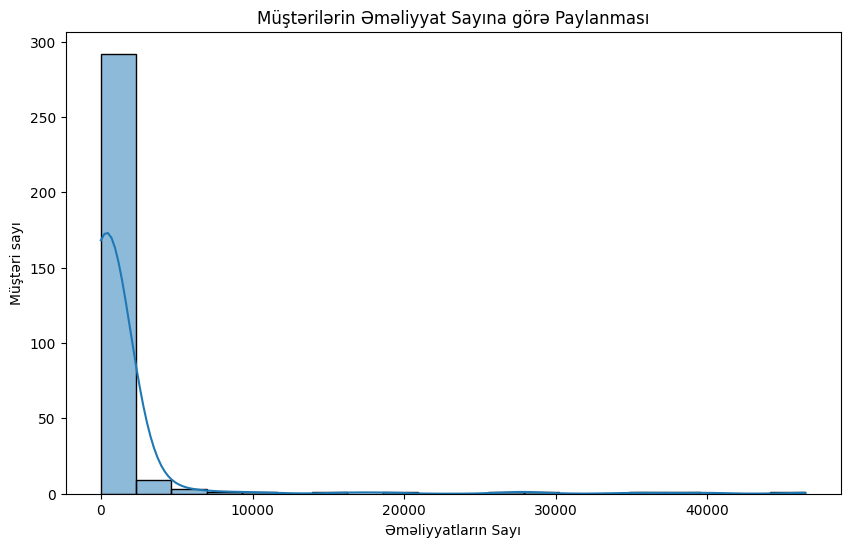

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['Əməliyyatların sayı'], bins=20, kde=True)
plt.title('Müştərilərin Əməliyyat Sayına görə Paylanması')
plt.xlabel('Əməliyyatların Sayı')
plt.ylabel('Müştəri sayı')
plt.show()

##### **Cinsə görə Xidməti Alıb-Almayan Müştərilərin Paylanması:**
##### **•** Hər iki cins üzrə xidmətlərin satışı izlənilməlidir. Kişi və qadın müştərilər üçün fərqli kampaniyalar hazırlamaq lazımdır. (Customer-base getmək).

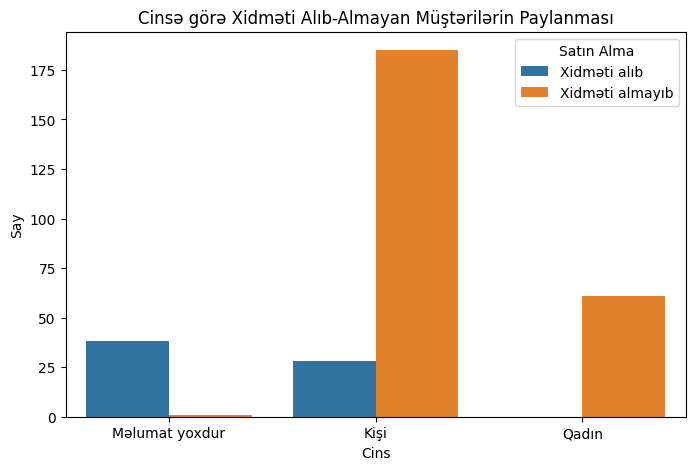

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='Cins', hue='Satın alma', data=df)
plt.title('Cinsə görə Xidməti Alıb-Almayan Müştərilərin Paylanması')
plt.xlabel('Cins')
plt.ylabel('Say')
plt.legend(title='Satın Alma')
plt.show()

##### **ATM Əməliyyatları üzrə Orta Gün İntervalı:**
##### **•** Müştərilərin ATM-dən istifadəsini izləyərək ATM xidmətlərini optimallaşdırmaq mümkündür. ATM əməliyyatları arasındakı intervalların artması xidmətin keyfiyyətinə mənfi təsir edə bilər.

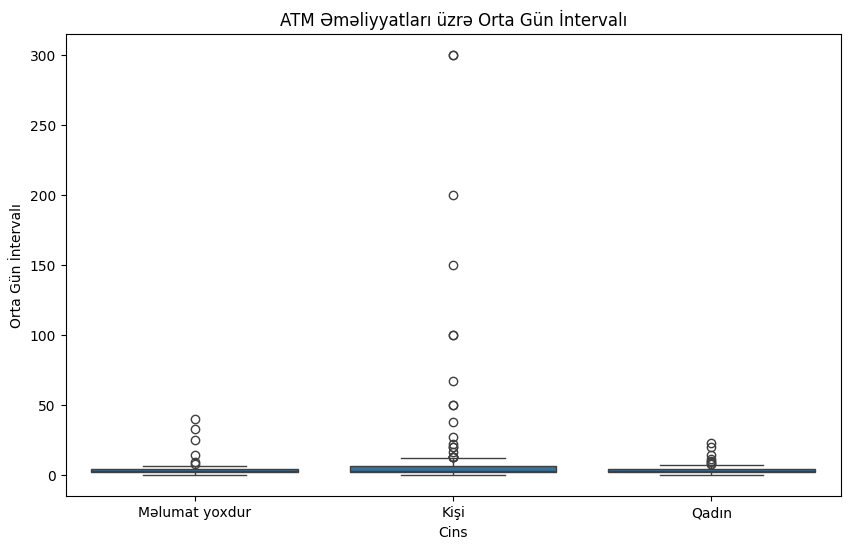

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cins', y='ATM əməliyyatları arasında orta gün intervalı', data=df)
plt.title('ATM Əməliyyatları üzrə Orta Gün İntervalı')
plt.xlabel('Cins')
plt.ylabel('Orta Gün İntervalı')
plt.show()

##### **Cari Balans və Nağd Əməliyyatların Medianına görə Müştəri Qrupları:**
##### **•** Bu təhlil müştərilərin maliyyə davranışlarını izləməyə kömək edə bilər. Tutaq ki, yüksək balanslı, amma az nağd əməliyyat edən müştərilər fərqli, aşağı balanslı və tez-tez nağd əməliyyat edən müştərilər isə fərqli xidmətlərə ehtiyac duyur.

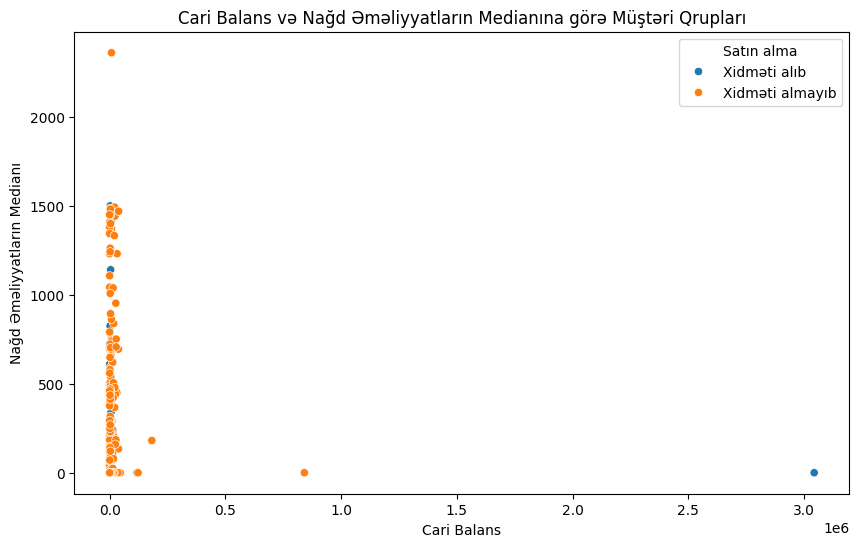

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cari balans', y='Nağd əməliyyatların medianı', hue='Satın alma', data=df)
plt.title('Cari Balans və Nağd Əməliyyatların Medianına görə Müştəri Qrupları')
plt.xlabel('Cari Balans')
plt.ylabel('Nağd Əməliyyatların Medianı')
plt.show()

##### **Əməliyyat Sayına görə Satın Alma:**
##### **•** Satın alma qərarları ilə əməliyyat sayı arasında əlaqəni aşkar edərək, müştərilərin xidmətləri alma ehtimalını qiymətləndirmək olar. Yüksək əməliyyat sayına malik müştərilərin xidmətlərə marağı daha yüksəkdir.

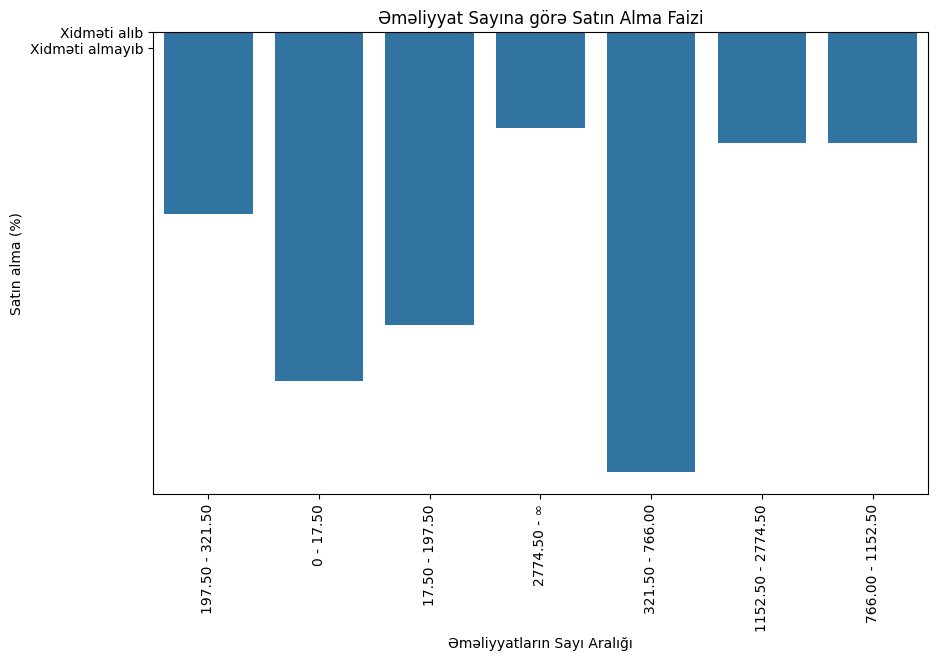

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Əməliyyatların sayı_aralıq', y='Satın alma', data=df, estimator=lambda x: len(x)/len(df)*100)
plt.title('Əməliyyat Sayına görə Satın Alma Faizi')
plt.xlabel('Əməliyyatların Sayı Aralığı')
plt.ylabel('Satın alma (%)')
plt.xticks(rotation=90)
plt.show()

##### **Əməliyyat Sayına görə Cinslər üzrə Təhlil:**
##### **•** Bu təhlil ilə cinsə görə əməliyyat sayında fərqlilikləri görmək olar. Cinslər arasında fərqli davranış modellərini təhlil edərək, müştəri qruplarına uyğun kampaniyalar yaratmaq mümkündür.

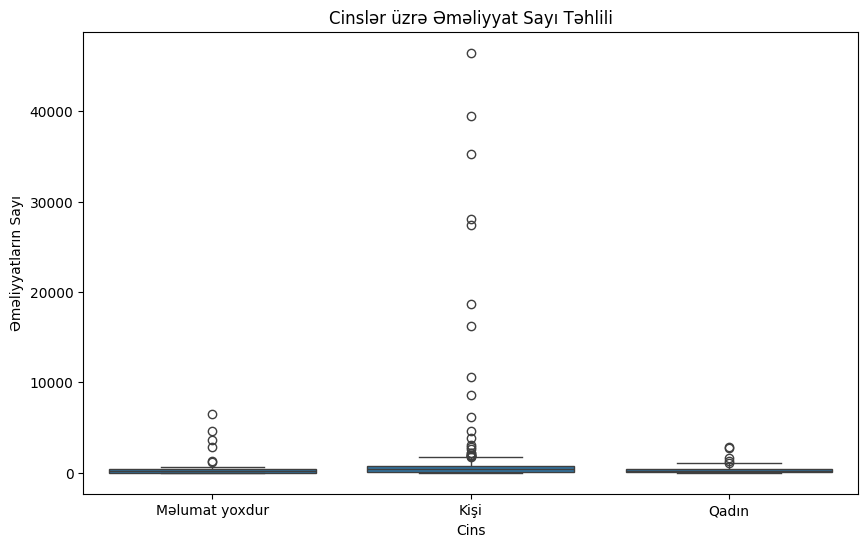

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cins', y='Əməliyyatların sayı', data=df)
plt.title('Cinslər üzrə Əməliyyat Sayı Təhlili')
plt.xlabel('Cins')
plt.ylabel('Əməliyyatların Sayı')
plt.show()

##### **Satın Alma Davranışına Cari Balansın Təsiri:**
##### **•** Yüksək balanslı müştərilərin daha çox xidmət alıb-almadığını öyrənmək üçün əla təhlildir. Belə müştərilər üçün daha yüksək səviyyəli xidmətlər və təkliflər nəzərdə tutulmalıdır.

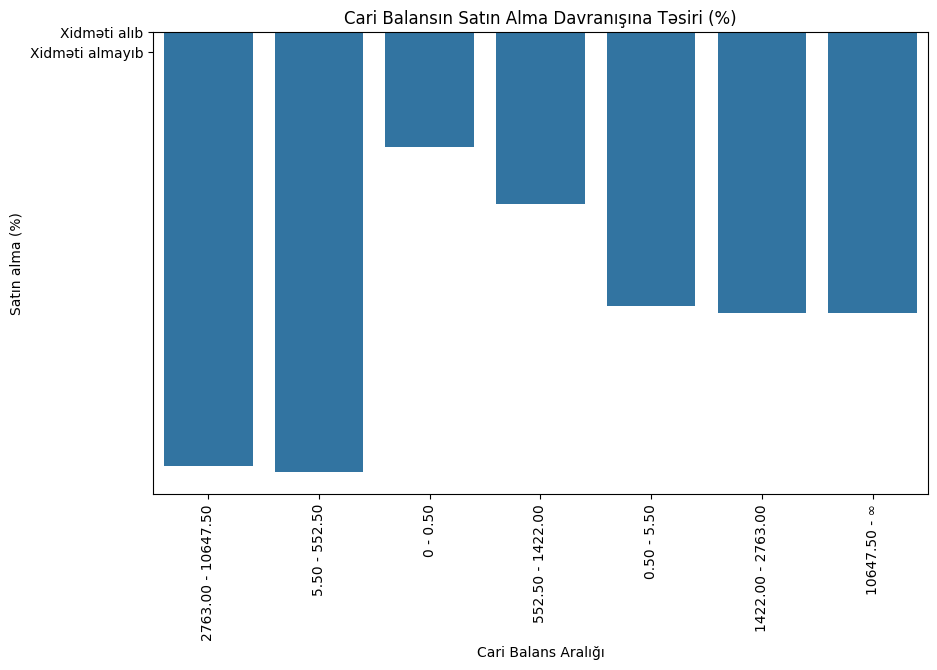

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='Cari balans_aralıq', y='Satın alma', data=df, estimator=lambda x: len(x)/len(df)*100)
plt.title('Cari Balansın Satın Alma Davranışına Təsiri (%)')
plt.xlabel('Cari Balans Aralığı')
plt.ylabel('Satın alma (%)')
plt.xticks(rotation=90)
plt.show()

##### **Nağd Əməliyyatların Medianı ilə Satın Alma Arasındakı Əlaqə:**
##### **•** Nağd əməliyyatların yüksək olduğu müştərilər bankın xidmətlərini daha çox satın alırsa, bu, həmin müştərilər üçün xüsusi təkliflərin verilməsini vacib edə bilər. Məncə, belə hallarda, bank nağd əməliyyatları üçün kampaniyalar təşkil edə bilər.

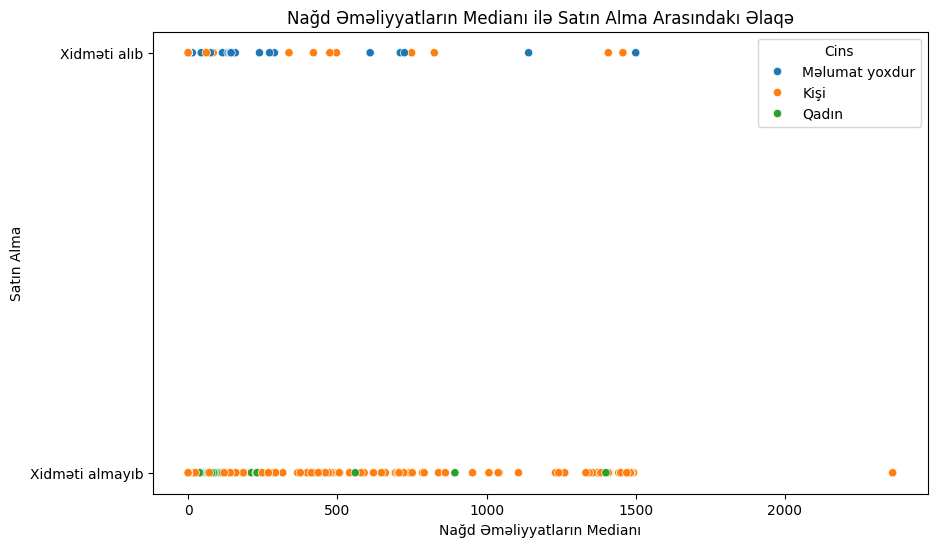

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Nağd əməliyyatların medianı', y='Satın alma', hue='Cins', data=df)
plt.title('Nağd Əməliyyatların Medianı ilə Satın Alma Arasındakı Əlaqə')
plt.xlabel('Nağd Əməliyyatların Medianı')
plt.ylabel('Satın Alma')
plt.show()

##### **ATM Əməliyyatları üzrə Xidməti Alıb-Almayan Müştərilərin Təhlili:**
##### **•** ATM əməliyyatları arasındakı böyük intervalları olan müştərilərin bankın xidmətlərini daha az istifadə etməsi halında, həmin müştərilər üçün ATM əməliyyatlarını artırmağa yönəlmiş strategiyalar yaradıla bilər.

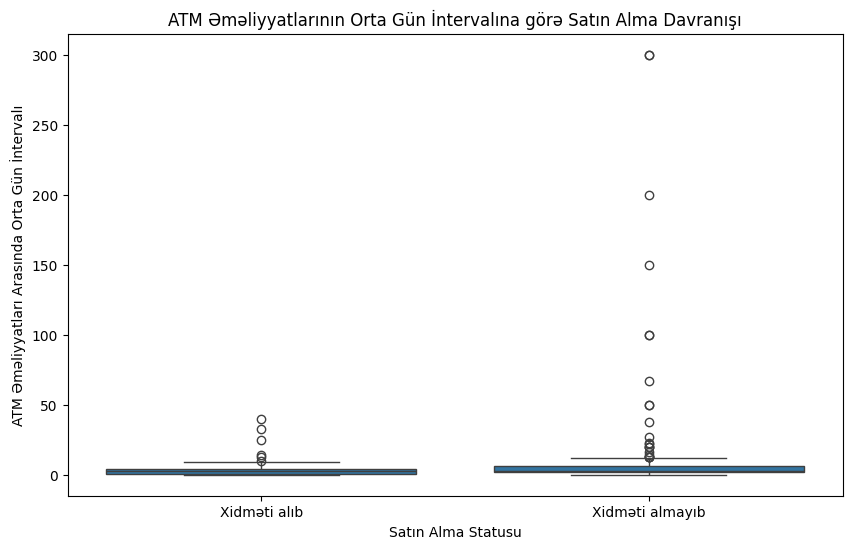

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Satın alma', y='ATM əməliyyatları arasında orta gün intervalı', data=df)
plt.title('ATM Əməliyyatlarının Orta Gün İntervalına görə Satın Alma Davranışı')
plt.xlabel('Satın Alma Statusu')
plt.ylabel('ATM Əməliyyatları Arasında Orta Gün İntervalı')
plt.show()

##### **Cari Balans ilə Əməliyyat Sayının Müqayisəsi:**
##### **•** Yüksək balanslı, lakin az əməliyyat edən müştərilər bankın aktiv xidmətlərindən istifadə etməyə yönəldilə bilər. Bu müştərilər üçün xüsusi aktivlik kampaniyaları və ya loyallıq proqramları təklif etmək mümkündür.

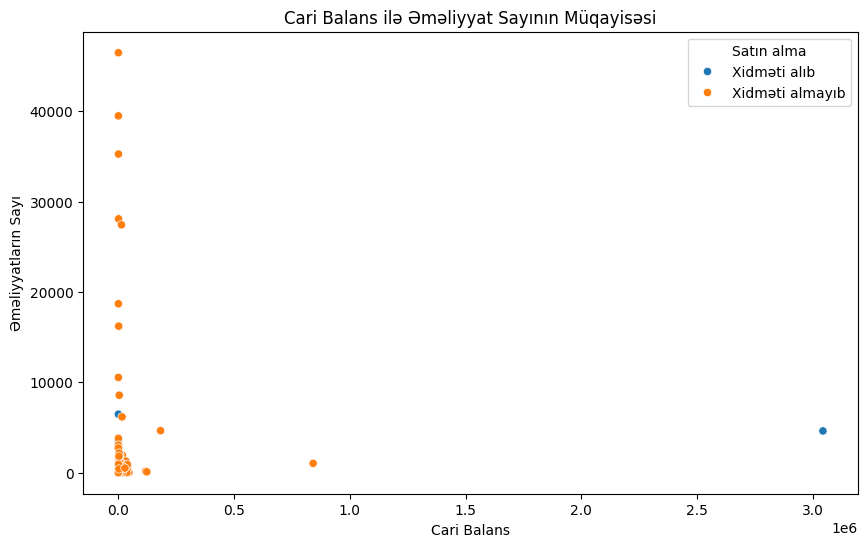

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cari balans', y='Əməliyyatların sayı', hue='Satın alma', data=df)
plt.title('Cari Balans ilə Əməliyyat Sayının Müqayisəsi')
plt.xlabel('Cari Balans')
plt.ylabel('Əməliyyatların Sayı')
plt.show()

![800px-ABB_Logo[1].png](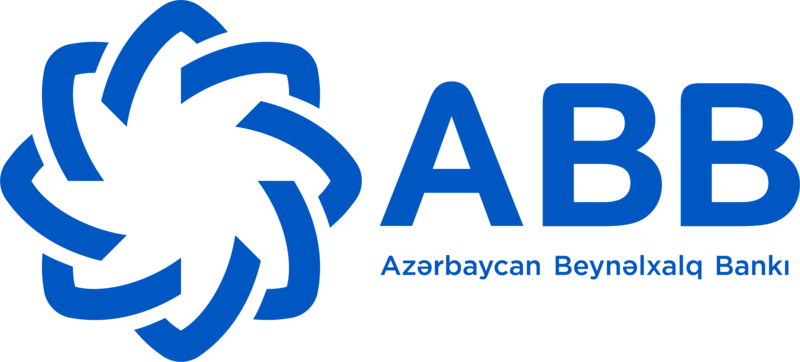)